## Práctica Calificada - Semana 1

Este es el primer entregable calificado. Debe completar todos los ejercicios para obtener un 100% en la calificación. Recuerde que tiene hasta el próximo viernes a medianoche para entregar el ejercicio en el aula virtual. 

Forma de entrega: por favor coloque el archivo Practica-Semana1-ipynb en un .zip con el figuiente formato:
- primera-letra-nombre.apellido-semana.zip 
- (por ejemplo, Juan Zamora debe entregar el archivo j.zamora-1.zip) La tarea debe subirse al aula virtual.


In [87]:
# 1 [COMPLETE] - imports: ponga todos sus imports en esta seccion: (1pt)
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.ticker as tkr
from sklearn.metrics import mean_squared_error

In [88]:
# utilizaremos Pandas para cargar los datos de un CSV

data = pd.read_csv("../data/precios-casas-1.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Ajuste

In [89]:
# AJUSTE [COMPLETE] (1pt)
# Las indicaciones estan en la Parte 3. (no resuelva esto sin haber completado 
# la Parte 1 y 2)

# el ajuste debe realizarse sobre la variable data.

# removemos el valor mas extremo de sqft_living
data = data[data.sqft_living < np.max(data.sqft_living)]

## Parte 1: Training Set

In [90]:
# 2 [COMPLETE] (1pt)
# - separe el dataset (data) en train (con 80%) y test set (con 20%) de los datos
# y = precio, X = sqft_living

y = data.price
X = data.sqft_living

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

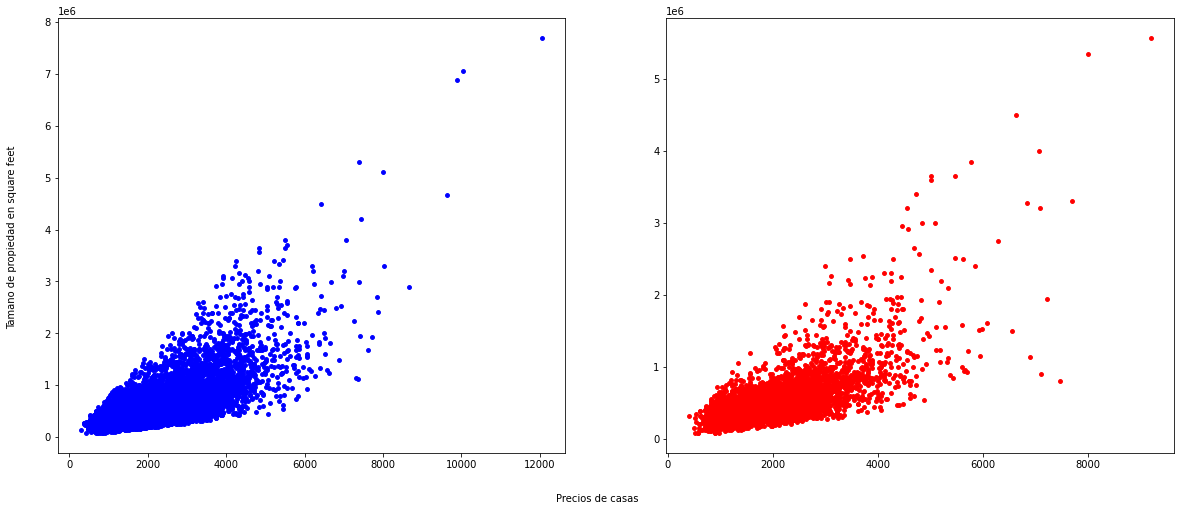

In [91]:
# 3 [COMPLETE] (3pt)
# despliegue el train set y el test set con matplotlib. Despliegue los charts usando
# scatter plots con puntos verdes para el training set y azules para el test set.
# ambos charts deben desplegarse de forma horizonal (uno al lado del otro)

# vamos a crear una figura con 2 slots con matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# ax1 es el primer grafico del set de entrenamiento (Azul)
ax1.scatter(X_train,y_train, marker = ".", s = 60, c = "blue")

# ax2 es el segundo grafico del set de pruebas (Rojo)
ax2.scatter(X_test,y_test, marker = ".", s = 60, c = "red")

fig.text(0.5, 0.04, 'Precios de casas', ha='center')
fig.text(0.09, 0.5, 'Tamano de propiedad en square feet', va='center', rotation='vertical')

plt.show()

In [92]:
# 4 [COMPLETE] (2pt)
# utilize Sklearn para generar el modelo de regresion lineal sobre el training set.
# imprima el valor de los coeficientes

x = np.array(X_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)

model = LinearRegression().fit(x, y)

b_1 = model.coef_[0]
b_0 = model.intercept_

print("b0:",b_0, "b1:", b_1)

b0: [-44745.03464149] b1: [281.09618644]


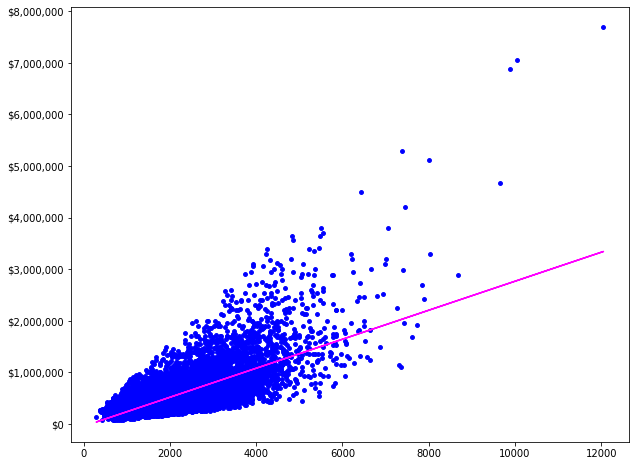

In [93]:
# 5 [COMPLETE] (2pt)
# despliegue con Matplotlib el trainig set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color magenta a la linea de regresion.

y_prima = model.predict(x)

def func(x, pos):  # formatter function takes tick label and tick position
    s = '$%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

x = np.array(X_train).reshape(-1,1)
y = np.array(y_train).reshape(-1,1)
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.scatter(x,y, marker = ".", s = 60, c = "blue")
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax.plot(x, y_prima, c="magenta")
plt.show()

In [95]:
# 6 [COMPLETE] (1pt)
# calcule el MSE del training set

mse = mean_squared_error(x, y_prima)
print("Set de Entrenamiento MSE:",mse)

Set de Entrenamiento MSE: 353060287799.92505


## Parte 2: Test Set

In [96]:
# 7 [COMPLETE] (1pt)
# Aplique el modelo generado (en el paso #4) sobre el test set. 
# Aqui debe generar la prediccion sobre el test set usando el modelo ya generado.

# y_prima_test = modelo.predecir(...)

y_prima_test = model.predict(np.array(X_test).reshape(-1,1))

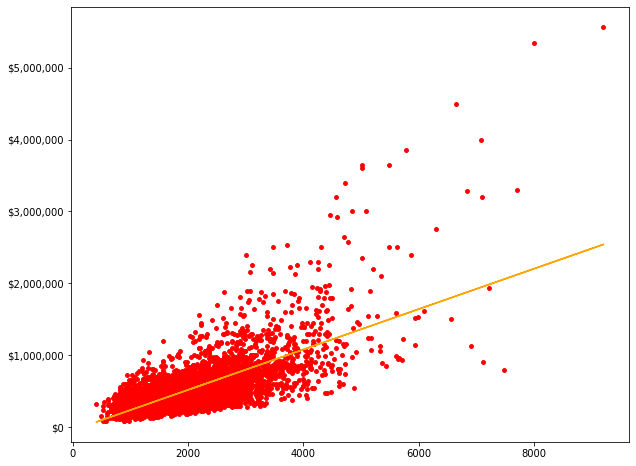

In [97]:
# 8 [COMPLETE] (2pt)
# despliegue con Matplotlib el test set y el modelo (funcion de regresion) sobre
# los datos. Aplique el color naranja a la linea de regresion.

x = np.array(X_test).reshape(-1,1)
y = np.array(y_test).reshape(-1,1)
fig, ax = plt.subplots(1,1, figsize=(10, 8))
ax.scatter(x,y, marker = ".", s = 60, c = "red")
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax.plot(x, y_prima_test, c="orange")
plt.show()

In [98]:
# 9 [COMPLETE] (1pt)
# calcule el MSE del test set

mse = mean_squared_error(x, y_prima_test)
print("Set de Pruebas MSE:",mse)

Set de Pruebas MSE: 361756614834.18207


## Parte 3: Ajuste del Problema.

In [100]:
# 10 [COMPLETE] (5pt)
# Existe un problema con los datos que afecta el modelo de regresion lineal. 
# Considere eliminar los datos que ud considere que estan dando problemas y
# vuelva a ejecutar los pasos del 1 al 9.
# PISTA: son 2 datos que afectan el modelo...

# es importante que este ajuste se realize en la casilla de AJUSTE, que esta antes
# de la Parte 1.

# antes de realizar el ajuste, salve el MSE_train y el MSE_test en variables para 
# que pueda comparar estos datos despues del ajuste

# Obtenga: 
MSE_train = 350838088156.1129
MSE_train_adj = 353060287799.92505
MSE_test = 367707026810.00867
MSE_test_adj = 361756614834.18207

print("Diff Entrenamiento", MSE_train - MSE_train_adj)
print("Diff Pruebas", MSE_test - MSE_test_adj)

Diff Entrenamiento -2222199643.812134
Diff Pruebas 5950411975.826599
